# **TP1 Partie 1**




# **Problème de Régression**


##**Introduction**

<br>

Le but de ce premier exercice est de se familiariser avec l'environnement __[Colab Notebook](https://colab.research.google.com/)__ et l'utilisation de quelques fonctionalités de la bibliothèque Python __[scikit-learn](http://scikit-learn.org)__ et de sa __[documentation](https://scikit-learn.org/stable/user_guide.html)__ (utilisez la recherche en haut à droite sur cette dernière page). Tous les modèles d'apprentissage de scikit-learn s'utilisent selon le même principe:  

Nous allons nous intéresser à un problème de régression sous l'angle des problématiques de l'apprentissage automatique. Rappelons que les problèmes de régression font partie de l'apprentissage supervisé.

<br>

Exécutez les cellules de ce carnet les unes après les autres.
En cas de problème d'exécution du code Python, vous pouvez redémarrer l'environnement d'exécution (onglet `Exécution` dans la barre du carnet en haut).
Pour ajouter vos commentaires personnels, créez une nouvelle cellule (onglet `Insert`) de type texte (à sélectionner dans le menu déroulant en haut du carnet). Vous pouvez aussi examiner le code source des cellules de cette page à l'aide du "double clic". Nous vous encourageons à écrire vos commentaires en couleur, comme dans l'exemple de la cellule suivante.



**Réponses aux questions**

<font color=green>
La réponse aux questions doit etre en couleur (en 'vert' par exemple)
Voici une réponse en couleur, et le code associé

```
<font color=green>
Un texte en couleur: il faut utiliser des balises HTML.
</font>
```
</font>
<br>

##**Importation des bibliothèques**

On commence par l'importation des bibliothèques utiles

In [ ]:
# import des bibliothèques Python utiles:
import warnings
warnings.filterwarnings('ignore')
!pip install scikit-learn==1.1.0
import numpy as np
import sklearn.linear_model as lm
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
# "magic function" Jupyter pour l'affichage des graphiques dans le carnet:
%matplotlib inline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 14.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


## Données: distance de freinage en fonction de la vitesse d'un véhicule

<br>

L'objectif de cet exercice est de prédire la distance d'arrêt d'un véhicule en fonction de sa vitesse, dans une approche "basée données".

Commencez par sauvegarder le fichier `freinage.txt` dans votre espace de travail.

Dans la cellule ci-dessous, on charge les données (les _observations_ ): `Y_data` représente la distance de freinage d'un véhicule en fonction de la vitesse `X_data` du véhicule.

__Remarque__: pour des raisons pédagogiques, il s'agit de données générées selon un modèle physique, et pas de données expérimentales réelles.

Les observations :

[[ 15.98398   -3.679057]
 [ 65.695402  22.53076 ]
 [116.269391  54.806719]
 [ 41.201177  19.665045]
 [ 74.956412  28.62853 ]
 [107.357295  51.028613]
 [ 20.770737  13.328044]
 [ 49.67538   25.20634 ]
 [ 17.030655   5.467875]
 [ 53.321847  12.121795]
 [ 88.391723  42.97039 ]
 [116.709241  62.821425]
 [ 31.245268   3.83422 ]
 [ 93.701953  30.538018]
 [ 90.111124  30.75043 ]
 [ 95.792907  46.11374 ]
 [ 88.803437  38.07346 ]
 [ 55.17268   15.208308]
 [ 23.548606   7.586668]
 [ 30.591548  18.194031]
 [ 55.015524  26.15015 ]
 [ 82.401539  28.387429]
 [ 36.493993  11.653713]
 [ 73.792717  29.12473 ]
 [ 75.339037  35.088041]
 [ 54.838235  28.778577]
 [ 58.210689  11.751026]
 [ 75.899272  33.167182]
 [ 41.674538  19.729731]
 [ 52.750517  19.674138]
 [118.54066   61.644225]
 [ 50.074723  16.330728]
 [106.383759  47.724664]
 [ 62.880298  19.941583]
 [ 16.255769   6.162072]
 [ 45.926296  21.793173]
 [111.442046  65.230563]
 [ 61.27061   36.695829]
 [ 40.00599   14.909924]
 [ 56

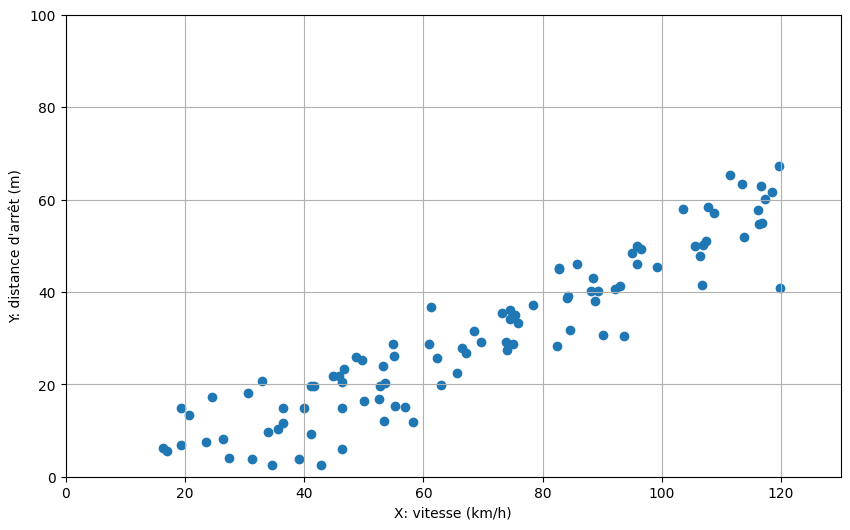

In [ ]:
data = np.loadtxt('freinage.txt')  # on lit les données dans un fichier txt
print("Les observations :\n")
print(data)

# les modules sklearn demandent que les données soient représentées par des vecteurs colonnes
X_data = data[:,0].reshape(len(data),1)  # première colonne (sans reshape, X_data serait un vecteur ligne)
Y_data = data[:,1].reshape(len(data),1)  # deuxième colonne
print("\nnombre d'observations : %d" %len(X_data))


plt.figure(figsize=(10,6))
plt.scatter(X_data, Y_data)
plt.xlabel("X: vitesse (km/h)")
plt.ylabel("Y: distance d'arrêt (m)")
plt.grid()
plt.xlim(0, 130)
plt.ylim(0, 100);  # le ; permet d'éviter un affichage intempestif dans le carnet

<br>

Nous allons à présent créer des modèles permettant de prédire les valeurs $y$ correspondant à des valeurs de $x$ entre 0 et 140 km/h. Ces modèles basés sur les données seront créés à partir des 100 valeurs $(x_{data},y_{data})$.

<br>

## Régression linéaire

Nous commençons par un modèle de régression linéaire. Cela consiste à prédire les valeurs de $y$ par une fonction affine de $x$:
$$ y_{pred} = a_0 + a_1 x$$

Les valeurs de $a_0$ et $a_1$ sont estimées par la méthode des moindres carrés: on cherche les paramètres $a_0$ et $a_1$ qui minimisent
$$\sum_{i=1}^n \left|y_{data}[i] - a_0 - a_1 x_{data}[i]\right|^2$$
sur l'ensemble des $n=100$ observations $(x_{data}[i],y_{data}[i])_{1\leq i\leq n}$.

In [ ]:
# On crée un objet scikit-learn pour la régression linéaire:
lr = lm.LinearRegression()
# lorsqu'on crée un objet scikit-learn, on dispose de méthodes et attributs
# voir les détails dans la documentation de LinearRegression: on ne se servira que de quelques uns d'entre eux

# On estime les paramètres a_0 et a_1:
# (remarque: sklearn attend des données sous forme de vecteurs colonnes)
lr.fit(X_data, Y_data)
# de manière générale, la méthode fit permet l'apprentissage des paramètres du modèle
# (ici par la méthodes des moindres carrés), qui sont stockés ici dans les attributs suivants:
print(lr.intercept_)
print(lr.coef_)

[-7.10006815]
[[0.54255848]]


__Question 1__. Quelles sont les valeurs de $a_0$ et $a_1$ ? (voir la [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html))

<font color=red>
a0 = -7.10006815 (intercept) <br>
a1 = 0.54255848 (coef)

La cellule suivante représente graphiquement la prédiction par régression linéaire.

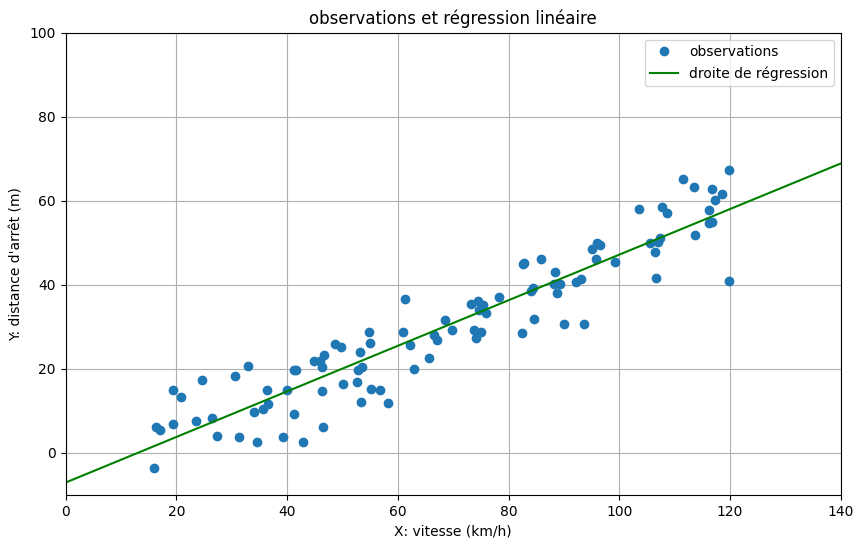

In [ ]:
# On "prédit" les valeurs de y pour 30 valeurs de x comprises entre 0 et 140
X = np.linspace(0,140,num=30).reshape(30,1)
Y_pred_lr = lr.predict(X)
# la méthode predict permet de prédire les valeurs y pour les valeurs de x passées en argument
# (à l'aide du modèle lr)

plt.figure(figsize=(10,6))
plt.plot(X_data, Y_data,'o')
plt.plot(X, Y_pred_lr, '-g')
plt.xlim(0, 140)
plt.ylim(-10, 100)
plt.xlabel("X: vitesse (km/h)")
plt.ylabel("Y: distance d'arrêt (m)")
plt.grid()
plt.title('observations et régression linéaire')
plt.legend(["observations","droite de régression"])

Comme on le voit, la droite de régression passe globalement entre les observations.

__Question 2__. Ce modèle vous semble-t-il réaliste?

<font color=red>
Nos dataset utilisé semble être linéaire pour les valeurs utilisées, le modèle représente bien une droite linéaire passant par les observations.
A noter une augmentation légère pour des valeurs hautes, donc ce modèle n'est peut être valable que pour ce range.

La cellule suivante permet d'afficher l'erreur quadratique moyenne de prédiction sur les observations.

__Question 3__. Comment cet indicateur est-il défini? (cherchez dans la documentation)

In [ ]:
print("régression linéaire: MSE = "+str(metrics.mean_squared_error(Y_data,lr.predict(X_data))))

régression linéaire: MSE = 38.014941983556334


<font color=red>
le MSE calcule la moyenne des carrés des différences entre les valeurs réelles et les valeurs prédites, ceci fois le nombre de données.

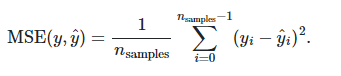

## Régression non linéaire

<br>

Nous allons à présent construire des modèles prédictifs polynomiaux:
$$ y_{pred} = a_0 + \sum_{i=1}^d a_d x^d$$
pour des entiers $d>1$.

Les coefficients $a_0, \dots, a_d$ sont toujours estimés par la méthode des moindres carrés.

Pour ce faire, on utilise une régression linéaire _multivariée_ au lieu d'utiliser comme régresseur la seule variable $x$, on utilise également les variables $x^2, x^3,\dots, x^d$. Tout se passe comme si les observations sont les vecteurs $(x,x^2,x^3,\dots, x^d)$.

In [ ]:
# création des vecteurs "puissance"
from sklearn.preprocessing import PolynomialFeatures
poly2 = PolynomialFeatures(degree=2,include_bias=False)
X_data2 = poly2.fit_transform(X_data)
poly6 = PolynomialFeatures(degree=6,include_bias=False)
X_data6 = poly6.fit_transform(X_data)
print("les cinq premières observations dans X_data6: \n(les colonnes contiennent les puissances successives de la première)")
print(X_data6[:5,:])

# modèle polynomial avec d=2
lrp2 = lm.LinearRegression()
lrp2.fit(X_data2,Y_data)
print("\nrégression polynomiale degré 2")
print(lrp2.intercept_)
print(lrp2.coef_)

# modèle polynomial avec d=6
lrp6 = lm.LinearRegression()
lrp6.fit(X_data6,Y_data)
print("\nrégresion polynomiale degré 6")
print(lrp6.intercept_)
print(lrp6.coef_)

les cinq premières observations dans X_data6: 
(les colonnes contiennent les puissances successives de la première)
[[1.59839800e+01 2.55487617e+02 4.08370895e+03 6.52739223e+04
  1.04333707e+06 1.66766788e+07]
 [6.56954020e+01 4.31588584e+03 2.83533856e+05 1.86268706e+07
  1.22369975e+09 8.03914472e+10]
 [1.16269391e+02 1.35185713e+04 1.57179605e+06 1.82751770e+08
  2.12484369e+10 2.47054282e+12]
 [4.12011770e+01 1.69753699e+03 6.99405218e+04 2.88163182e+06
  1.18726623e+08 4.89167659e+09]
 [7.49564120e+01 5.61846370e+03 4.21139880e+05 3.15671343e+07
  2.36615913e+09 1.77358798e+11]]

régression polynomiale degré 2
[-0.24933671]
[[0.30069149 0.00173845]]

régresion polynomiale degré 6
[-87.95432804]
[[ 1.22311857e+01 -5.94839548e-01  1.43700764e-02 -1.79390784e-04
   1.11757601e-06 -2.74606993e-09]]


__Question 4__. Comment s'écrivent les deux modèles de prédiction de $y$ en fonction de $x$?  (ne reportez que quelques chiffres significatifs)

<font color =red>
y = -0.24933671 + 0.30069149x + 0.00173845x² <br>
y = -87.95432804 + 1.22311857x -5.94839548x²  1.43700764x^3 -1.79390784x^4
   1.11757601x^5 -2.74606993x^6
<br>
   --> Voici les deux modèles de prédiction l'un degré 2 et l'autre 6


La représentation graphique des différents modèle est donnée par la cellule suivante.

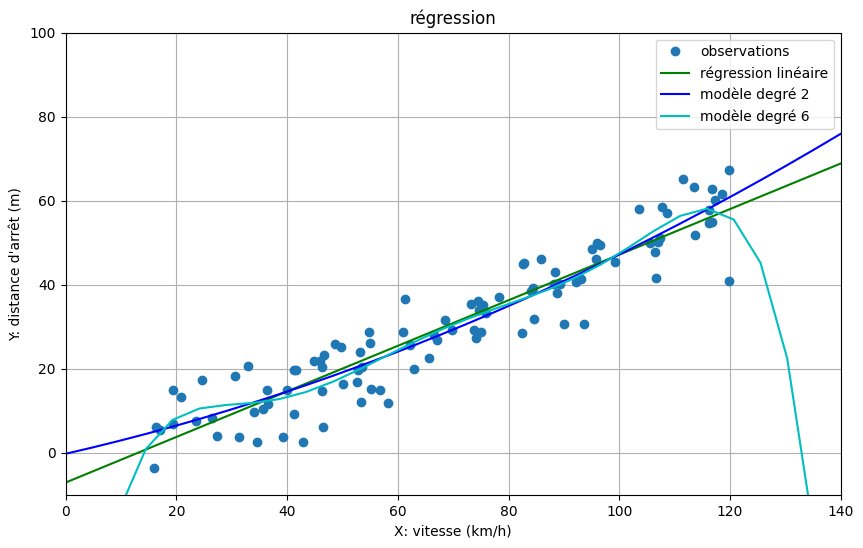

In [ ]:
X2=poly2.fit_transform(X)
X6=poly6.fit_transform(X)
Y_pred_lrp2=lrp2.predict(X2)  # prédiction du modèle sur les valeurs X définies plus haut, pour le graphique
Y_pred_lrp6=lrp6.predict(X6)

plt.figure(figsize=(10,6))
plt.plot(X_data, Y_data,'o')
plt.plot(X, Y_pred_lr, '-g')
plt.plot(X, Y_pred_lrp2, '-b')
plt.plot(X, Y_pred_lrp6, '-c')
plt.xlim(0, 140)
plt.ylim(-10, 100)
plt.xlabel("X: vitesse (km/h)")
plt.ylabel("Y: distance d'arrêt (m)")
plt.grid()
plt.title('régression')
plt.legend(["observations","régression linéaire","modèle degré 2","modèle degré 6"])

__Question 5__. Comment interprêter ces résultats, ainsi que les calculs de MSE ci-dessous, dans le vocabulaire de l'apprentissage automatique?

In [ ]:
print("régression linéaire: MSE = %.3f" %metrics.mean_squared_error(Y_data,lr.predict(X_data)))

print("régression polynomiale degré 2, MSE = %.3f" %metrics.mean_squared_error(Y_data,lrp2.predict(X_data2)))

print("régression polynomiale degré 6, MSE = %.3f" %metrics.mean_squared_error(Y_data,lrp6.predict(X_data6)))


régression linéaire: MSE = 38.015
régression polynomiale degré 2, MSE = 35.893
régression polynomiale degré 6, MSE = 34.279


<font color=red>
En théorique, plus le MSE est petit plus le modèle est performant. Mais on remarque que le modèle de degré 6 fait de l'over fitting car en dehors des dataset d'entrainements l'écart de la courbe est énorme par rapport a la courbe dans le range des dataset, le modèle est trop complexe. <br> <br>
Le modèle régression linéaire est quand à lui moins performant que le modèle 2, il fait de l'underfitting. <br> <br>
Le modèle de degré 2 est le plus représentatif, il suit une cohérence hors données du dataset.

## Régression _ridge_

Une manière classique de contrer le surapprentissage est de contraindre les paramètres du modèle prédictif à prendre des valeurs "pas trop grandes" (on dit qu'on _régularise_ le modèle).

Dans le cadre de la régression, au lieu d'estimer les paramètres $a_i$ par minimisation des moindres carrés, on peut chercher à minimiser:
$$\sum_{i=1}^n \left|y_{data}[i] - a_0 - \sum_{j=1}^d a_j x_{data}[i]^j\right|^2 + \alpha \sum_{j=1}^d a_j^2$$
où $\alpha$ est un paramètre positif, fixé _a priori_ par l'utilisateur (on parle d'_hyperparamètre_ car $\alpha$ ne fait pas partie des paramètres estimés par minimisation de la fonction précédente).

On voit apparaître un compromis entre l'adéquation aux données (mesurée par la MSE, premier terme de l'expression) et la valeur des paramètres $a_j$ (qui interviennent par le carré de la norme euclidienne du vecteur $(a_1,\dots,a_d) $). On remarque que la régression linéaire classique correspond au cas particulier $\alpha=0$.

Notons deux points:
- le coefficient $a_0$ n'est pas inclus dans la régularisation;
- il vaut mieux normaliser les caractéristiques (les composantes des observations) de manière à ce qu'elles varient dans le même intervalle, sinon la régularisation n'aurait pas le même effet sur chacune d'entre elles.

Cette méthode est la régression _ridge_.

<br>

L'influence du paramètre $\alpha$ est illustrée par la cellule suivante, dans le cas d'une régression polynomiale.

Remarquez `normalize=True`, et notez que vous retrouvez bien les valeurs de la régression linéaire classique pour $\alpha=0$.


ridge regression alpha=0
[-87.95429141]
[[ 1.22311879e+01 -5.94839659e-01  1.43700775e-02 -1.79390785e-04
   1.11757597e-06 -2.74606978e-09]]

ridge regression alpha=0.1
[3.89877959]
[[ 2.29175910e-01  1.16521771e-03  6.03047699e-06  2.53359054e-08
   3.40921034e-11 -9.88082169e-13]]

ridge regression alpha=1
[12.4324115]
[[1.14495160e-01 6.87280433e-04 4.68819611e-06 3.27684205e-08
  2.30427135e-10 1.62247940e-12]]

ridge regression alpha=10
[23.37072708]
[[3.62518047e-02 2.48737703e-04 1.95071792e-06 1.57286916e-08
  1.27909664e-10 1.04439695e-12]]

ridge regression alpha=100
[29.24330744]
[[5.15818601e-03 3.61826104e-05 2.89360384e-07 2.37306582e-09
  1.95834663e-11 1.61942694e-13]]


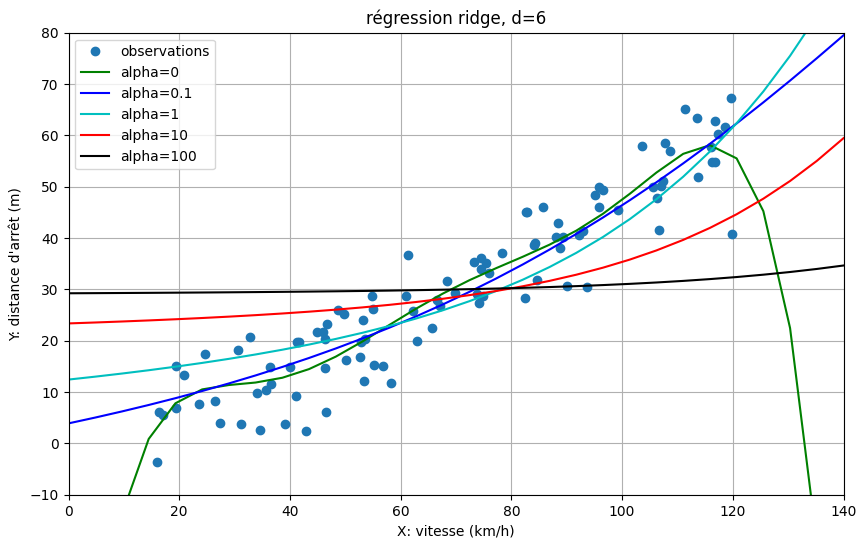

In [ ]:
ridgealpha0 = lm.Ridge(normalize=True, alpha=0)
ridgealpha0.fit(X_data6,Y_data)
print("ridge regression alpha=0")
print(ridgealpha0.intercept_)
print(ridgealpha0.coef_)
Y_pred_ridgealpha0 = ridgealpha0.predict(X6)

ridgealpha01 = lm.Ridge(normalize=True, alpha=0.1)
ridgealpha01.fit(X_data6,Y_data)
print("\nridge regression alpha=0.1")
print(ridgealpha01.intercept_)
print(ridgealpha01.coef_)
Y_pred_ridgealpha01 = ridgealpha01.predict(X6)

ridgealpha1 = lm.Ridge(normalize=True, alpha=1)
ridgealpha1.fit(X_data6,Y_data)
print("\nridge regression alpha=1")
print(ridgealpha1.intercept_)
print(ridgealpha1.coef_)
Y_pred_ridgealpha1 = ridgealpha1.predict(X6)

ridgealpha10 = lm.Ridge(normalize=True, alpha=10)
ridgealpha10.fit(X_data6,Y_data)
print("\nridge regression alpha=10")
print(ridgealpha10.intercept_)
print(ridgealpha10.coef_)
Y_pred_ridgealpha10 = ridgealpha10.predict(X6)

ridgealpha100 = lm.Ridge(normalize=True, alpha=100)
ridgealpha100.fit(X_data6,Y_data)
print("\nridge regression alpha=100")
print(ridgealpha100.intercept_)
print(ridgealpha100.coef_)
Y_pred_ridgealpha100 = ridgealpha100.predict(X6)

plt.figure(figsize=(10,6))
plt.plot(X_data, Y_data,'o')
plt.plot(X, Y_pred_ridgealpha0, '-g')
plt.plot(X, Y_pred_ridgealpha01, '-b')
plt.plot(X, Y_pred_ridgealpha1, '-c')
plt.plot(X, Y_pred_ridgealpha10, '-r')
plt.plot(X, Y_pred_ridgealpha100, '-k')
plt.xlim(0, 140)
plt.ylim(-10, 80)
plt.xlabel("X: vitesse (km/h)")
plt.ylabel("Y: distance d'arrêt (m)")
plt.grid()
plt.title('régression ridge, d=6')
plt.legend(["observations","alpha=0","alpha=0.1","alpha=1","alpha=10","alpha=100"])

Notez que les coefficients $a_j$ ($1\leq j \leq 6$) diminuent et que $a_0$ tend vers la moyenne des $Y_\text{data}[i]$ lorsque $\alpha$ augmente. Il faut maintenant choisir l'hyperparamètre $\alpha$.

<br>

__Question 6__. que fait `RidgeCV` lorsqu'on l'appelle par `lm.RidgeCV()`? (voir la documentation: on ne vous demande que le principe général, pas le rôle de chaque paramètre)

<font color=red>
Lorsqu'on appelle la fonction lm.RidgeCV(), elle effectue une recherche par validation croisée pour choisir automatiquement la meilleure valeur de l'hyperparamètre de régularisation alpha pour un modèle de régression Ridge.

La cellule suivante réalise la régression _ridge_ avec sélection de l'hyperparamètre $\alpha$ par validation croisée. Ici, on cherche dans une gamme de valeurs de $\alpha$ plus large que celle utilisée par défaut: quelle est-elle exactement? Notez qu'on normalise les caractéristiques et qu'on utilise une validation croisée à 5 plis. Après normalisation, il est d'usage de chercher $\alpha$ autour de la valeur 1.

In [ ]:
ridge1 = lm.RidgeCV( normalize=True, alphas=np.logspace(-5, 5, 20), cv=5)
ridge1.fit(X_data,Y_data)
print("ridge regression, polynome degré 1")
print(ridge1.intercept_)
print(ridge1.coef_)
print("alpha sélectionné: %.5f" %ridge1.alpha_)

ridge2 = lm.RidgeCV(normalize=True, alphas=np.logspace(-5, 5, 20), cv=5)
ridge2.fit(X_data2,Y_data)
print("\nridge regression, polynome degré 2")
print(ridge2.intercept_)
print(ridge2.coef_)
print("alpha sélectionné: %.5f" %ridge2.alpha_)

ridge6 = lm.RidgeCV(normalize=True, alphas=np.logspace(-5, 5, 20), cv=5)
ridge6.fit(X_data6,Y_data)
print("\nridge regression, polynome degré 6")
print(ridge6.intercept_)
print(ridge6.coef_)
print("alpha sélectionné: %.5f" %ridge6.alpha_)

ridge regression, polynome degré 1
[-6.94082467]
[[0.54024551]]
alpha sélectionné: 0.00428

ridge regression, polynome degré 2
[1.0177924]
[[0.2749677  0.00182783]]
alpha sélectionné: 0.04833

ridge regression, polynome degré 6
[1.3866148]
[[ 2.57628912e-01  1.43460165e-03  7.40390491e-06  2.48813448e-08
  -8.37009637e-11 -2.97571775e-12]]
alpha sélectionné: 0.01438


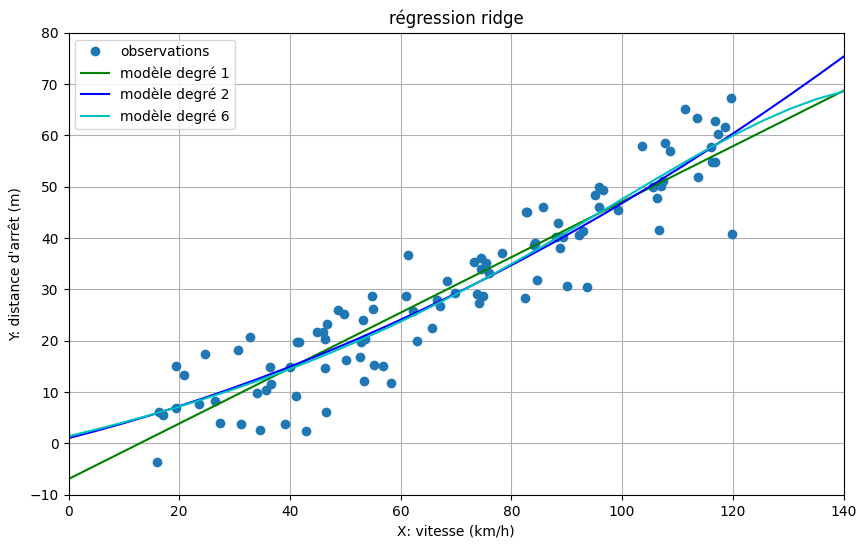

In [ ]:
Y_pred_lrr1=ridge1.predict(X)
Y_pred_lrr2=ridge2.predict(X2)
Y_pred_lrr6=ridge6.predict(X6)

plt.figure(figsize=(10,6))
plt.plot(X_data, Y_data,'o')
plt.plot(X, Y_pred_lrr1, '-g')
plt.plot(X, Y_pred_lrr2, '-b')
plt.plot(X, Y_pred_lrr6, '-c')
plt.xlim(0, 140)
plt.ylim(-10, 80)
plt.xlabel("X: vitesse (km/h)")
plt.ylabel("Y: distance d'arrêt (m)")
plt.grid()
plt.title('régression ridge')
plt.legend(["observations","modèle degré 1","modèle degré 2","modèle degré 6"]);

In [ ]:
print("régression ridge polynomiale degré 1, MSE = %.2f" %metrics.mean_squared_error(Y_data,ridge1.predict(X_data)))

print("régression ridge polynomiale degré 2, MSE = %.2f" %metrics.mean_squared_error(Y_data,ridge2.predict(X_data2)))

print("régression ridge polynomiale degré 6, MSE = %.2f" %metrics.mean_squared_error(Y_data,ridge6.predict(X_data6)))


régression ridge polynomiale degré 1, MSE = 38.02
régression ridge polynomiale degré 2, MSE = 36.06
régression ridge polynomiale degré 6, MSE = 35.62


__Question 7__. Comment évoluent les valeurs des paramètres par rapport à la régression classique? Constatez que la régularisation permet de définir des modèles moins affectés par le surapprentissage.

<font color=red>
 Nous pouvons remarquer que la régularisation permet de réduire le surapprentissage, la courbe a nettement diminué l'ecart d'erreur par rapport au modèle sans régression bridge, mais celui ci n'est pas optimal car il entame une baisse à 120 km/h en fin de dataset.



## Régression Lasso

Expérimentez le _Lasso_ , décrit __[dans la documentation](https://scikit-learn.org/stable/modules/linear_model.html#lasso)__.

__Question 8__. Quelle est la différence essentielle avec la régression ridge? On utilisera __[LassoCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html#sklearn.linear_model.LassoCV)__. Comment comprenez-vous la remarque _"As the Lasso regression yields sparse models, it can thus be used to perform feature selection"_ dans la documentation?

_Remarques_ :
- observez dans la documentation que la stratégie pour fixer l'hyperparamètre $\alpha$ n'est pas la même que pour `RidgeCV`
- on change la valeur de `max_iter` pour éviter un problème de convergence dans le dernier modèle (essayez sans cette option)

<font color=red>
"As the Lasso regression yields sparse models, it can thus be used to perform feature selection"<br>
La régression lasso tout comme la régression bridge sert à régulariser le modèle polynomial afin d'éviter le surapprentissage.
Cela signifie que la régression Lasso effectue automatiquement la sélection ede coeff. en les supprimant, ceci est la principal différence avec la régression brudge qui ne le fait pas.

In [ ]:
lasso1 = lm.LassoCV(normalize=True)
lasso1.fit(X_data,np.ravel(Y_data))  # le lasso attend un 1D array pour y, d'où "np_ravel"
print("lasso regression, fonction affine")
print(lasso1.intercept_)
print(lasso1.coef_)
print("alpha sélectionné: %.5f" %lasso1.alpha_)

lasso2 = lm.LassoCV(normalize=True)
lasso2.fit(X_data2,np.ravel(Y_data))
print("\nlasso regression, polynome degré 2")
print(lasso2.intercept_)
print(lasso2.coef_)
print("alpha sélectionné: %.5f" %lasso2.alpha_)

lasso6 = lm.LassoCV(normalize=True, max_iter=10000)  # (max_iter pour éviter des problèmes numériques ensuite)
lasso6.fit(X_data6,np.ravel(Y_data))
print("\nlasso regression, polynome degré 6")
print(lasso6.intercept_)
print(lasso6.coef_)
print("alpha sélectionné: %.5f" %lasso6.alpha_)

print("régression ridge polynomiale degré 1, MSE = %.2f" %metrics.mean_squared_error(Y_data,lasso1.predict(X_data)))

print("régression ridge polynomiale degré 2, MSE = %.2f" %metrics.mean_squared_error(Y_data,lasso2.predict(X_data2)))
print("régression ridge polynomiale degré 6, MSE = %.2f" %metrics.mean_squared_error(Y_data,lasso6.predict(X_data6)))

lasso regression, fonction affine
-7.06271406252532
[0.54201592]
alpha sélectionné: 0.00163

lasso regression, polynome degré 2
-0.241863541589872
[0.30116251 0.00173137]
alpha sélectionné: 0.00163

lasso regression, polynome degré 6
0.2488663950191743
[0.2966271  0.00169972 0.         0.         0.         0.        ]
alpha sélectionné: 0.02841
régression ridge polynomiale degré 1, MSE = 38.02
régression ridge polynomiale degré 2, MSE = 35.89
régression ridge polynomiale degré 6, MSE = 35.97


__Question 9__. Que dire des coefficients calculés?

<font color=red>
Certains coeff. calculés sont mis à zero par la méthode lasso.

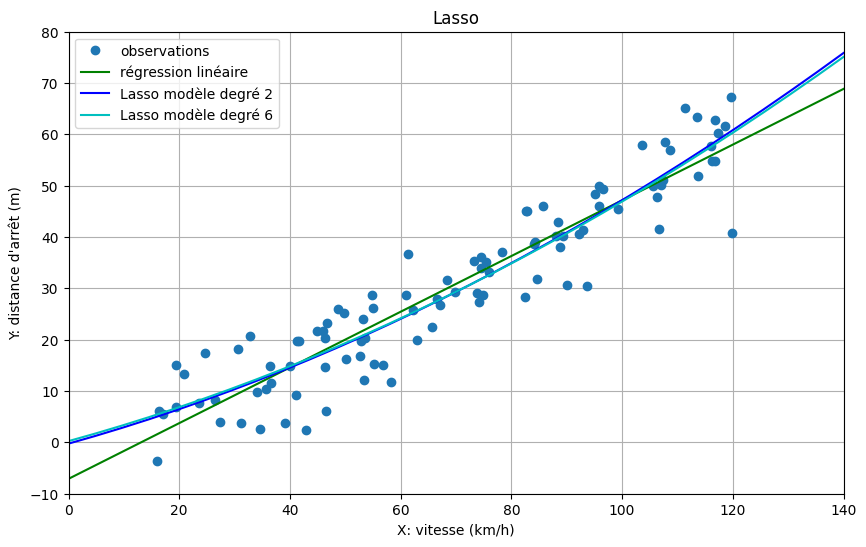

In [ ]:
Y_pred_lasso1=lasso1.predict(X)
Y_pred_lasso2=lasso2.predict(X2)
Y_pred_lasso6=lasso6.predict(X6)

plt.figure(figsize=(10,6))
plt.plot(X_data, Y_data,'o')
plt.plot(X, Y_pred_lr, '-g')
plt.plot(X, Y_pred_lasso2, '-b')
plt.plot(X, Y_pred_lasso6, '-c')
plt.xlim(0, 140)
plt.ylim(-10, 80)
plt.xlabel("X: vitesse (km/h)")
plt.ylabel("Y: distance d'arrêt (m)")
plt.grid()
plt.title('Lasso')
plt.legend(["observations","régression linéaire","Lasso modèle degré 2","Lasso modèle degré 6"]);

Les physiciens nous apprennent qu'un modèle réaliste de la distance d'arrêt $D$ en fonction de la vitesse initiale $v_0$ est donné par la relation:
$$ D = v_0 t_r + \frac{v_0^2}{2a}$$

où $a$ est la décélération (supposée constante), et $t_r$ le temps de réaction.

Voir cette __[page wikipedia](https://fr.wikipedia.org/wiki/Distance_d%27arr%C3%AAt)__.

Les données de cet exercice ont été générées en supposant un temps de réaction de une seconde et une décélération de $10 m.s^{-2}$, ce qui aboutit à cette équation:
$$Y=X/3.6+(X/3.6)^2/(2*10)$$

Un bruit gaussien d'écart-type grandissant avec X a été ensuite ajouté à Y.

On devrait donc obtenir un modèle de degré 2 avec pour valeurs de paramètres:

In [ ]:
print("a_0 = 0")
print("a_1 = %.5f" %(1/3.6))
print("a_2 = %.5f" %(1/(3.6**2*2*10)))

a_0 = 0
a_1 = 0.27778
a_2 = 0.00386


__Question 10__. Comparez aux modèles basés sur les données obtenus précédemment.

<font color=red>
Nous pouvons remarquer que le coeff a_1 qui correspond a 0.2966271  pour le degré 6 est très proche du modèle réaliste 0.278, ce qui implique que le modèle et la régression lasso est adapté.

__Question 11__. En utilisant la fonction `cross_val_score` expliquée sur [cette page](https://scikit-learn.org/stable/modules/cross_validation.html) et en vous inspirant de l'exemple ci-dessous pour la régression linéaire, déterminez quel est le meilleur modèle parmi ceux que vous avez envisagés (c'est-à-dire lr, lrp2, lrp6, ridge1, ridge2, ridge6, lasso1, lasso2, lasso6). Utilisez la même syntaxe que dans `fit` pour spécifier les données en argument de `cross_val_score`. Par défaut, le score calculé pour tous ces modèles est le [coefficient de détermination](https://fr.wikipedia.org/wiki/Coefficient_de_d%C3%A9termination) $R^2$: plus il est proche de 1, meilleur est le modèle sur le pli de test. On voit d'après la définition sur la page wikipedia que si l'écart entre la vraie valeur et la valeur prédite sur le pli de test est grand, alors $R^2$ peut être négatif. C'est le cas en particulier s'il y a surapprentissage.

_Remarque_ : on utilise une validation croisée à 5 plis (valeur par défaut dans la dernière version de `scikit-learn`) par cohérence avec ce que l'on a utilisé pour sélectionner l'hyperparamètre de la régression ridge et du lasso. Néanmoins, le critère est ici le coefficient de détermination, ce qui n'est pas le cas dans ̀`RidgeCV()` et `LassoCV()`.

In [ ]:
# votre code ici:
from sklearn.model_selection import cross_val_score

# Créez une liste contenant tous les modèles
models = [lr, lrp2, lrp6, ridge1, ridge2, ridge6, lasso1, lasso2, lasso6]

# Boucle pour évaluer chaque modèle et calculer le R² moyen
scores = cross_val_score(lrp2, X_data2, Y_data, cv=5, scoring='r2') #cv =5 car 5 plis, on sélectionne les data d'entrainements et la méthode de scoring
Moy_score = scores.mean()#fait la moyenne des résultats
print(f"Modèle : lrp2, R² moyen : {Moy_score:.4f}")

scores = cross_val_score(lrp6, X_data6, Y_data, cv=5, scoring='r2') #cv =5 car 5 plis, on sélectionne les data d'entrainements et la méthode de scoring
Moy_score = scores.mean()#fait la moyenne des résultats
print(f"Modèle : lrp6, R² moyen : {Moy_score:.4f}")

scores = cross_val_score(ridge1, X_data, Y_data, cv=5, scoring='r2') #cv =5 car 5 plis, on sélectionne les data d'entrainements et la méthode de scoring
Moy_score = scores.mean()#fait la moyenne des résultats
print(f"Modèle : ridge1, R² moyen : {Moy_score:.4f}")

scores = cross_val_score(ridge2, X_data2, Y_data, cv=5, scoring='r2') #cv =5 car 5 plis, on sélectionne les data d'entrainements et la méthode de scoring
Moy_score = scores.mean()#fait la moyenne des résultats
print(f"Modèle : ridge2, R² moyen : {Moy_score:.4f}")

scores = cross_val_score(ridge6, X_data6, Y_data, cv=5, scoring='r2') #cv =5 car 5 plis, on sélectionne les data d'entrainements et la méthode de scoring
Moy_score = scores.mean()#fait la moyenne des résultats
print(f"Modèle : ridge6, R² moyen : {Moy_score:.4f}")

scores = cross_val_score(lasso1, X_data, Y_data, cv=5, scoring='r2') #cv =5 car 5 plis, on sélectionne les data d'entrainements et la méthode de scoring
Moy_score = scores.mean()#fait la moyenne des résultats
print(f"Modèle : lasso1, R² moyen : {Moy_score:.4f}")

scores = cross_val_score(lasso2, X_data2, Y_data, cv=5, scoring='r2') #cv =5 car 5 plis, on sélectionne les data d'entrainements et la méthode de scoring
Moy_score = scores.mean()#fait la moyenne des résultats
print(f"Modèle : lasso2, R² moyen : {Moy_score:.4f}")

scores = cross_val_score(lasso6, X_data6, Y_data, cv=5, scoring='r2') #cv =5 car 5 plis, on sélectionne les data d'entrainements et la méthode de scoring
Moy_score = scores.mean()#fait la moyenne des résultats
print(f"Modèle : lasso6, R² moyen : {Moy_score:.4f}")





Modèle : lrp2, R² moyen : 0.8566
Modèle : lrp6, R² moyen : 0.8449
Modèle : ridge1, R² moyen : 0.8597
Modèle : ridge2, R² moyen : 0.8578
Modèle : ridge6, R² moyen : 0.8467
Modèle : lasso1, R² moyen : 0.8601
Modèle : lasso2, R² moyen : 0.8566
Modèle : lasso6, R² moyen : 0.8545


<font color=red>
Ce code utilisera la validation croisée pour évaluer chaque modèle et calculera le R² moyen pour chaque modèle sur les plis de test. Le modèle avec le R² moyen le plus élevé sera considéré comme le meilleur modèle.